In [571]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplt
import statsmodels as sm
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [572]:
%matplotlib inline

### Exploratory Data Analysis

In [573]:
corollas = pd.read_csv('ToyotaCorolla.csv')
corollas.head(3)

Id    Price  Age_08_22       KM Fuel_Type    HP Color  Automatic      CC  \
0  NaN      NaN        NaN      NaN       NaN   NaN   NaN        NaN     NaN   
1  1.0  13500.0       23.0  46986.0    Diesel  90.0  Blue        0.0  2000.0   
2  NaN      NaN        NaN      NaN       NaN   NaN   NaN        NaN     NaN   

   Doors  ...  Airbag_1  Airbag_2  Airco  CD_Player  Powered_Windows  \
0    NaN  ...       NaN       NaN    NaN        NaN              NaN   
1    3.0  ...       1.0       1.0    0.0        0.0              1.0   
2    NaN  ...       NaN       NaN    NaN        NaN              NaN   

   Power_Steering  Radio  Mistlamps  Sport_Model  Metallic_Rim  
0             NaN    NaN        NaN          NaN           NaN  
1             1.0    0.0        0.0          0.0           0.0  
2             NaN    NaN        NaN          NaN           NaN  

[3 rows x 24 columns]

In [574]:
corollas.shape

(2872, 24)

In [575]:
corollas.dtypes

Id                 float64
Price              float64
Age_08_22          float64
KM                 float64
Fuel_Type           object
HP                 float64
Color               object
Automatic          float64
CC                 float64
Doors              float64
Cylinders          float64
Gears              float64
Mfr_Guarantee      float64
ABS                float64
Airbag_1           float64
Airbag_2           float64
Airco              float64
CD_Player          float64
Powered_Windows    float64
Power_Steering     float64
Radio              float64
Mistlamps          float64
Sport_Model        float64
Metallic_Rim       float64
dtype: object

In [576]:
corollas.isnull().sum()

Id                 1436
Price              1437
Age_08_22          1436
KM                 1436
Fuel_Type          1436
HP                 1436
Color              1445
Automatic          1436
CC                 1441
Doors              1436
Cylinders          1436
Gears              1436
Mfr_Guarantee      1437
ABS                1436
Airbag_1           1436
Airbag_2           1436
Airco              1437
CD_Player          1436
Powered_Windows    1436
Power_Steering     1436
Radio              1436
Mistlamps          2471
Sport_Model        1436
Metallic_Rim       1436
dtype: int64

In [577]:
#drop all null rows -> data has alternate rows as null
corollas = corollas.dropna(axis = 0, how = 'all')
corollas = corollas.reset_index(drop=True)

In [578]:
print(corollas.shape)
corollas.isnull().sum()

(1436, 24)


Id                    0
Price                 1
Age_08_22             0
KM                    0
Fuel_Type             0
HP                    0
Color                 9
Automatic             0
CC                    5
Doors                 0
Cylinders             0
Gears                 0
Mfr_Guarantee         1
ABS                   0
Airbag_1              0
Airbag_2              0
Airco                 1
CD_Player             0
Powered_Windows       0
Power_Steering        0
Radio                 0
Mistlamps          1035
Sport_Model           0
Metallic_Rim          0
dtype: int64

In [579]:
#dropping mistlamps column as there is more than 70% data without values
#dropping rows that have "Price", "Color","CC", "Mfr_Guarantee", "Price", "Airco" as nulls (Very less when compared to total rows)
corollas = corollas.drop('Mistlamps', axis=1)
corollas = corollas.dropna(axis=0, subset = ["Price", "Color","CC", "Mfr_Guarantee", "Price", "Airco" ])
corollas.isnull().sum()

Id                 0
Price              0
Age_08_22          0
KM                 0
Fuel_Type          0
HP                 0
Color              0
Automatic          0
CC                 0
Doors              0
Cylinders          0
Gears              0
Mfr_Guarantee      0
ABS                0
Airbag_1           0
Airbag_2           0
Airco              0
CD_Player          0
Powered_Windows    0
Power_Steering     0
Radio              0
Sport_Model        0
Metallic_Rim       0
dtype: int64

In [580]:
predictors_df = corollas.loc[:, corollas.columns != 'Price']
response_df = corollas['Price']

In [581]:
#flagging variables
predictors_df = pd.get_dummies(predictors_df, drop_first = True)
predictors_df.head()

Id  Age_08_22       KM    HP  Automatic      CC  Doors  Cylinders  Gears  \
0  1.0       23.0  46986.0  90.0        0.0  2000.0    3.0        4.0    5.0   
1  2.0       23.0  72937.0  90.0        0.0  2000.0    3.0        4.0    5.0   
2  3.0       24.0  41711.0  90.0        0.0  2000.0    3.0        4.0    5.0   
3  4.0       26.0  48000.0  90.0        0.0  2000.0    3.0        4.0    5.0   
4  5.0       30.0  38500.0  90.0        0.0  2000.0    3.0        4.0    5.0   

   Mfr_Guarantee  ...  Fuel_Type_Petrol  Color_Black  Color_Blue  Color_Green  \
0            0.0  ...                 0            0           1            0   
1            0.0  ...                 0            0           0            0   
2            1.0  ...                 0            0           1            0   
3            1.0  ...                 0            1           0            0   
4            1.0  ...                 0            1           0            0   

   Color_Grey  Color_Red  Color_Silver  Color_Violet  Color_White  \
0           0          0             0             0            0   
1           0          0             1             0            0   
2           0          0             0             0            0   
3           0          0             0             0            0   
4           0          0             0             0            0   

   Color_Yellow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 31 columns]

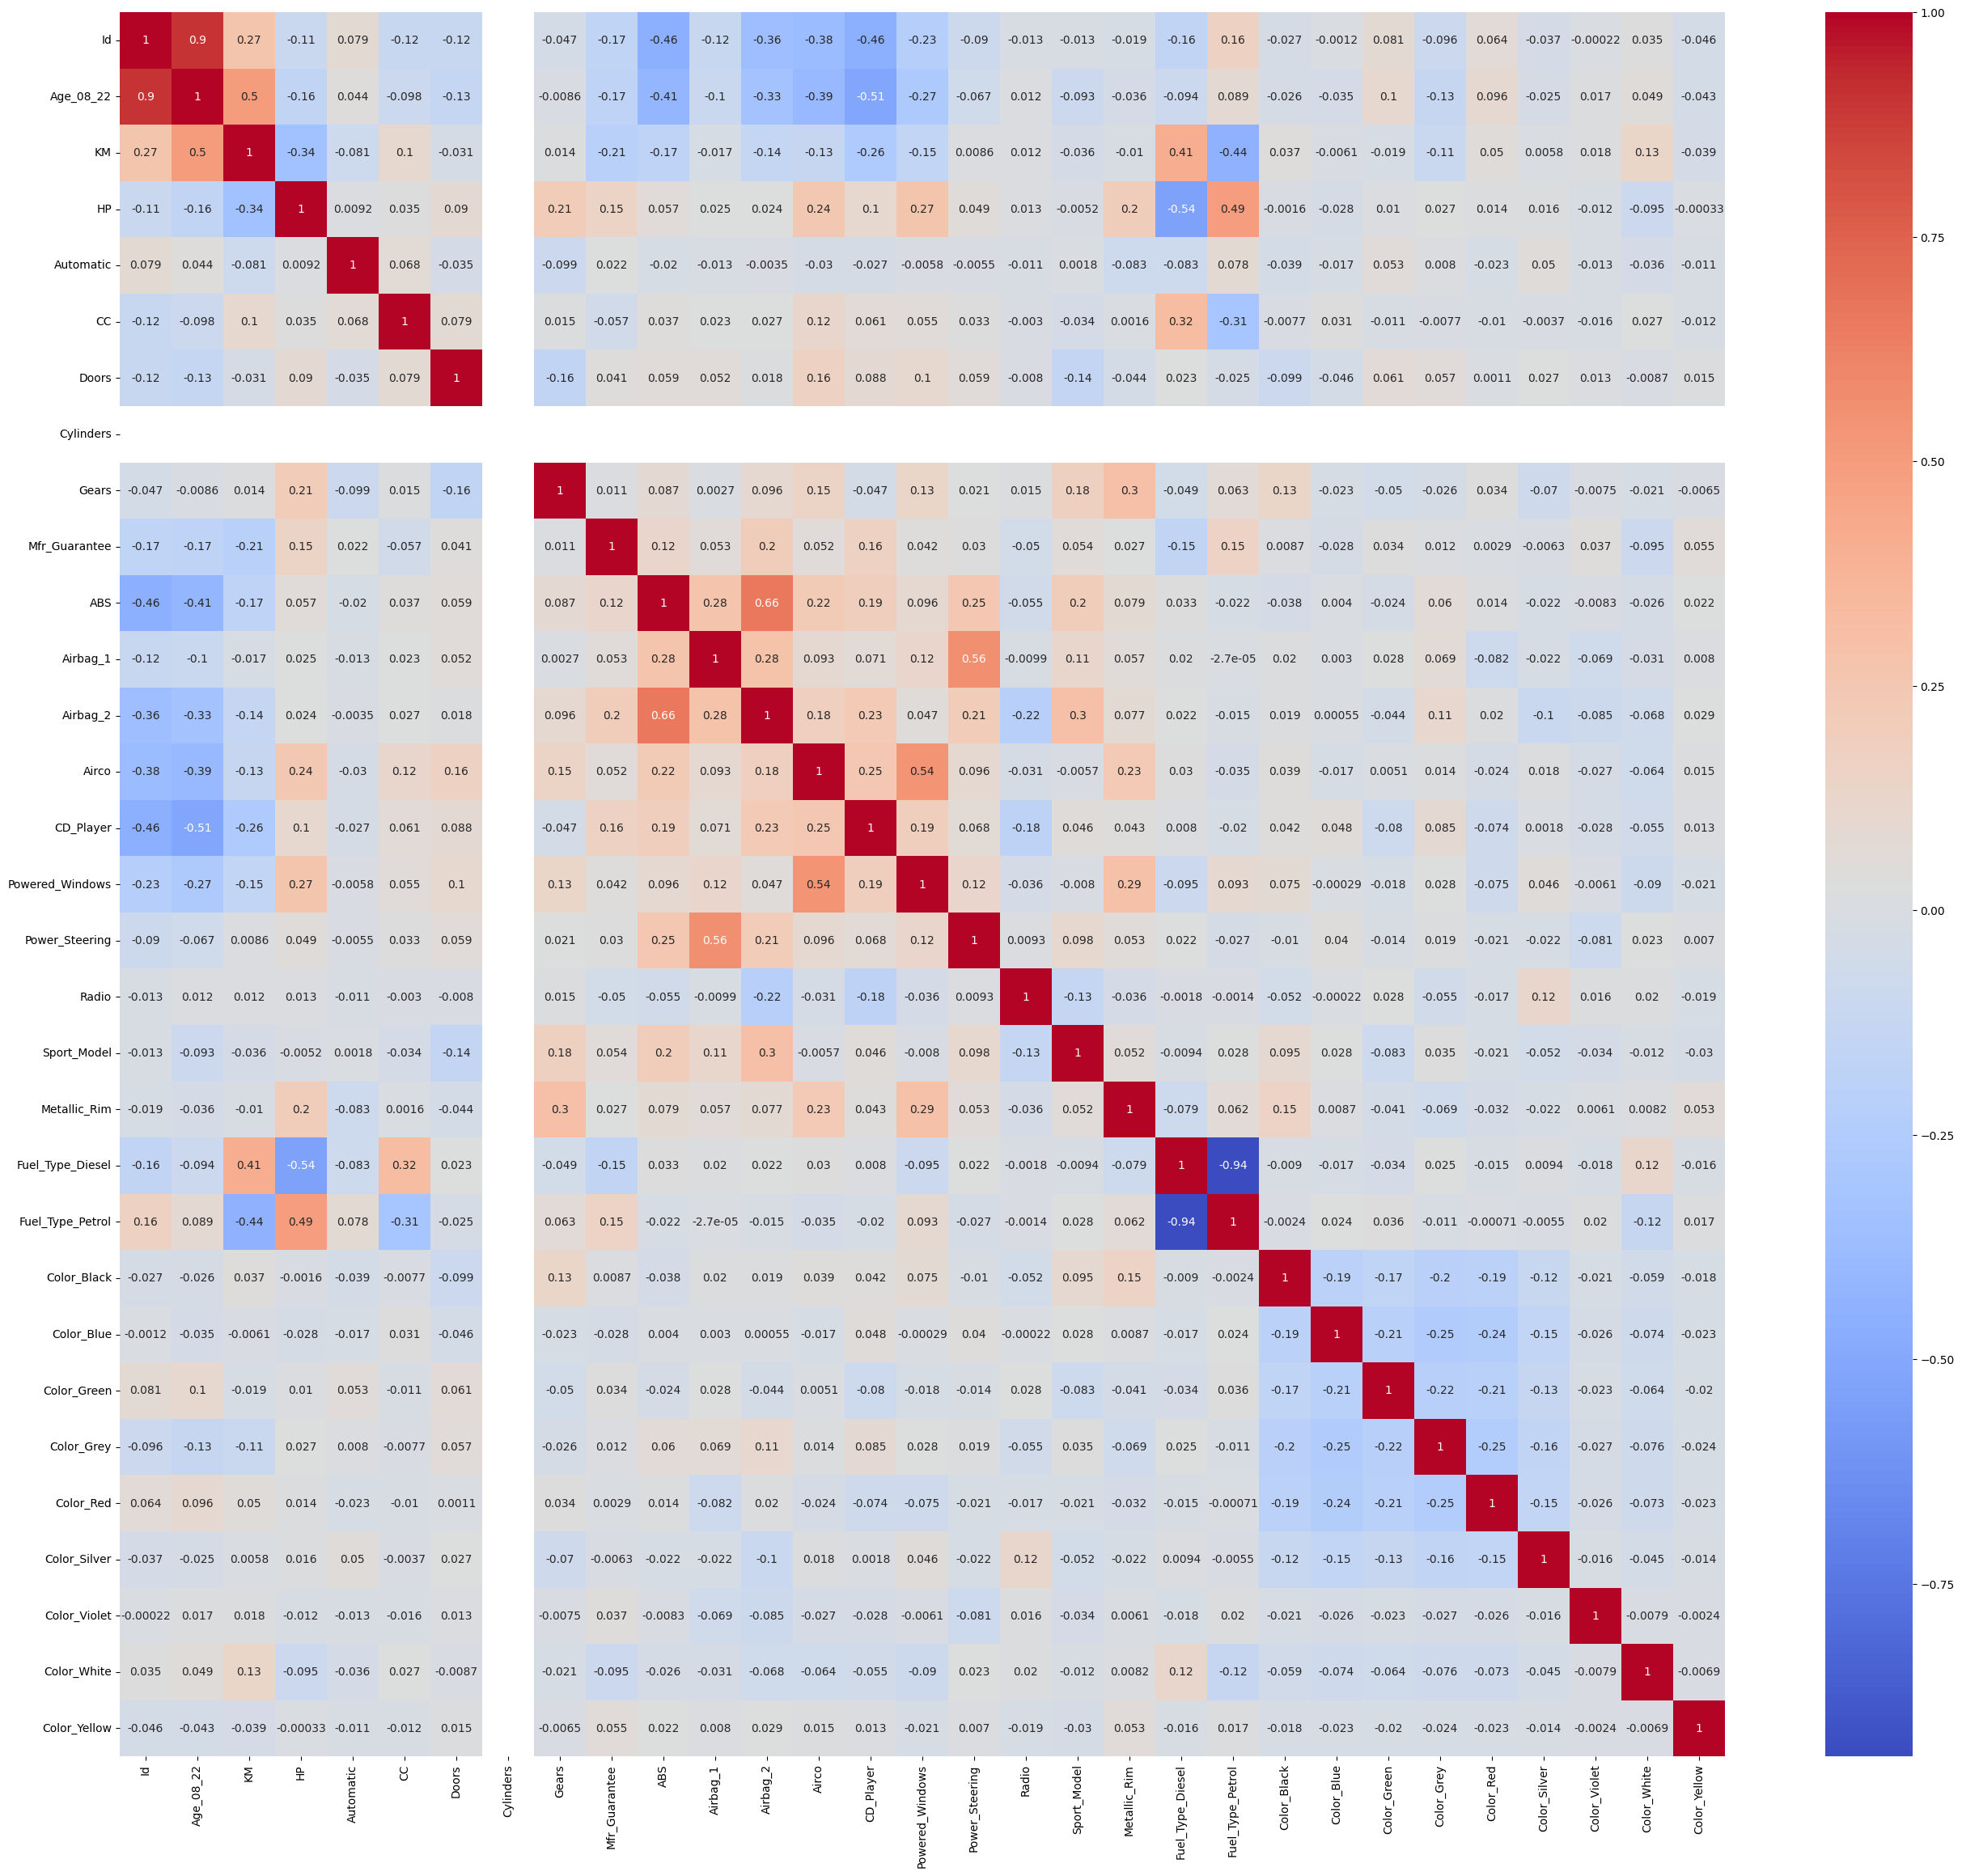

In [582]:
#correlation between predictors
corr = predictors_df.corr()
pyplt.figure(figsize=(32, 28 ))
sns.heatmap(corr, cmap='coolwarm',annot = True )
plt.show()

In [583]:
# deleting cylinders column because it has constant value for all the rows resulting in zero correlation with other columns
# deleting ID column because id column is unique and doesn't add value
# deleting Fuel_Type_Diesel because of high correlation with Fuel_Type_Petrol
predictors_df = predictors_df.drop(axis=1, columns = ["Id", "Fuel_Type_Diesel","Cylinders" ])
predictors_df.head()

Age_08_22       KM    HP  Automatic      CC  Doors  Gears  Mfr_Guarantee  \
0       23.0  46986.0  90.0        0.0  2000.0    3.0    5.0            0.0   
1       23.0  72937.0  90.0        0.0  2000.0    3.0    5.0            0.0   
2       24.0  41711.0  90.0        0.0  2000.0    3.0    5.0            1.0   
3       26.0  48000.0  90.0        0.0  2000.0    3.0    5.0            1.0   
4       30.0  38500.0  90.0        0.0  2000.0    3.0    5.0            1.0   

   ABS  Airbag_1  ...  Fuel_Type_Petrol  Color_Black  Color_Blue  Color_Green  \
0  1.0       1.0  ...                 0            0           1            0   
1  1.0       1.0  ...                 0            0           0            0   
2  1.0       1.0  ...                 0            0           1            0   
3  1.0       1.0  ...                 0            1           0            0   
4  1.0       1.0  ...                 0            1           0            0   

   Color_Grey  Color_Red  Color_Silver  Color_Violet  Color_White  \
0           0          0             0             0            0   
1           0          0             1             0            0   
2           0          0             0             0            0   
3           0          0             0             0            0   
4           0          0             0             0            0   

   Color_Yellow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 28 columns]

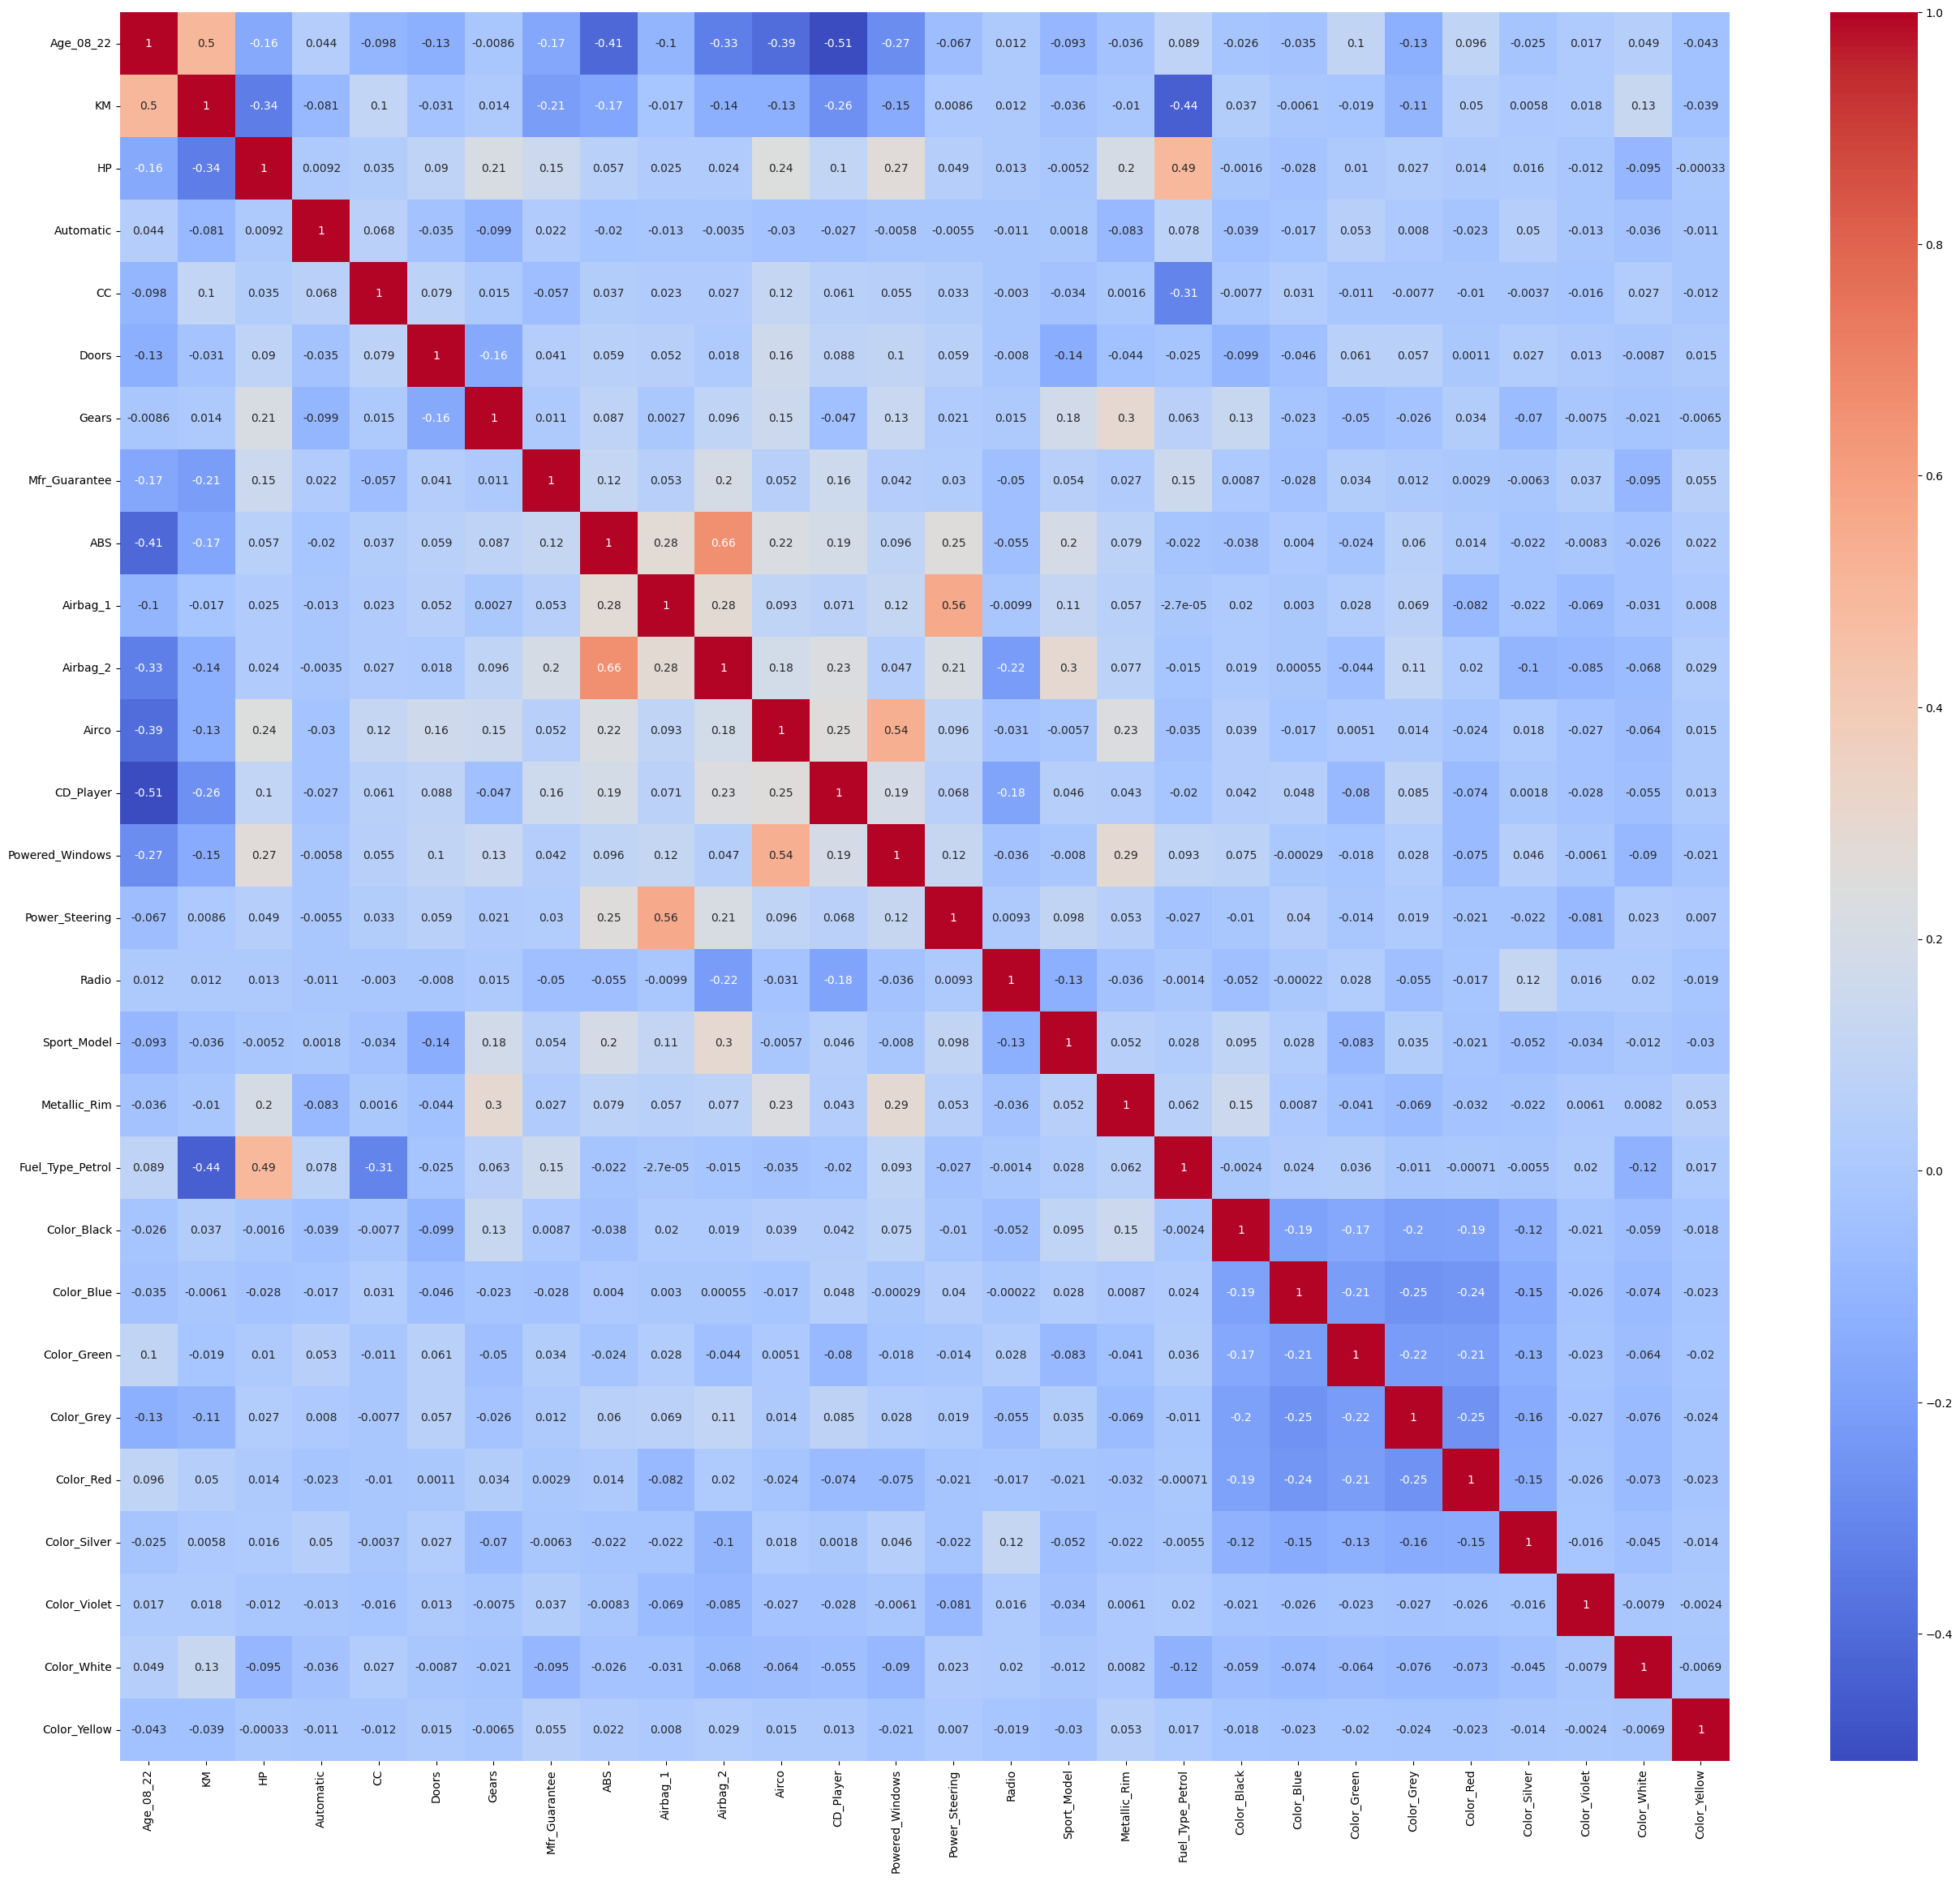

In [584]:
#correlation after dropping columns
corr = predictors_df.corr()
pyplt.figure(figsize=(32, 28 ))
sns.heatmap(corr, cmap='coolwarm',annot = True )
plt.show()

In [585]:
print(predictors_df.shape)
print(response_df.shape)

(1419, 28)
(1419,)


In [586]:
x = predictors_df
y = response_df
train_x_original, test_x_original, train_y_original, test_y_original = train_test_split(x, y, test_size=0.3, random_state=1)

In [587]:
print(train_x_original.shape)
print(train_y_original.shape)
print(test_x_original.shape)
print(test_y_original.shape)

(993, 28)
(993,)
(426, 28)
(426,)


In [588]:
#Z score normalization of test and train data
z_score_norm1 = preprocessing.StandardScaler()
z_score_norm1.fit(train_x_original)
train_x_scaled = pd.DataFrame(z_score_norm1.transform(train_x_original), 
                                          columns = predictors_df.columns)

test_x_scaled = pd.DataFrame(z_score_norm1.transform(test_x_original), 
                                          columns = predictors_df.columns)

train_x_scaled = train_x_scaled.reset_index(drop=True)
test_x_scaled = test_x_scaled.reset_index(drop=True)
train_y_original = train_y_original.reset_index(drop=True)
test_y_original = test_y_original.reset_index(drop=True)

In [589]:
print(train_x_original.shape)
print(train_y_original.shape)
print(test_x_original.shape)
print(test_y_original.shape)

#train_x_linear = sm.api.add_constant(train_X)
#test_x_linear = sm.api.add_constant(test_X)


print(train_x_scaled.shape)
print(train_y_original.shape)
print(test_x_scaled.shape)
print(test_y_original.shape)


#linear_model = sm.OLS(train_y_linear, train_x_linear).fit()
#linear_model.params
#linear_model = LinearRegression()
#linear_model = linear_model.fit(train_x_linear, train_y_linear)

(993, 28)
(993,)
(426, 28)
(426,)
(993, 28)
(993,)
(426, 28)
(426,)


In [590]:
#OLS model for regression
#because test data already has column with same value (constant value) so add_constant() needs another parameterhas_constant='add' 
train_x_linear = sm.api.add_constant(train_x_scaled)
test_x_linear = sm.api.add_constant(test_x_scaled, has_constant='add')

print(train_x_linear.shape)
print(test_x_linear.shape)
print(train_y_original.shape)
print(train_x_linear)
print(test_x_linear)
#linear_model3 = sm.api.OLS(train_y_original, train_x_linear).fit()
#linear_model3.params

(993, 29)
(426, 29)
(993,)
     const  Age_08_22        KM        HP  Automatic        CC     Doors  \
0      1.0  -0.881277 -1.342723 -0.274170  -0.253592 -0.368151  1.031080   
1      1.0  -0.114599 -0.521185  0.589485  -0.253592  0.035557  1.031080   
2      1.0   1.035418  2.044945 -1.004955  -0.253592 -0.570005 -1.071307   
3      1.0   0.597316  1.541382 -1.935044  -0.253592  0.842973  1.031080   
4      1.0  -0.771752 -0.096395  0.589485  -0.253592  0.035557  1.031080   
..     ...        ...       ...       ...        ...       ...       ...   
988    1.0   0.213977  0.439668 -1.004955  -0.253592 -0.570005 -1.071307   
989    1.0   0.378265 -0.294809  0.589485  -0.253592  0.035557 -1.071307   
990    1.0   0.925892  1.249612  0.589485  -0.253592  0.035557 -0.020113   
991    1.0  -0.716989 -0.379457  0.589485  -0.253592  0.035557  1.031080   
992    1.0   0.816367  1.859962 -1.868610  -0.253592  0.842973 -2.122500   

        Gears  Mfr_Guarantee       ABS  ...  Fuel_Type_Petro

In [591]:
linear_model3 = sm.api.OLS(train_y_original, train_x_linear).fit()
linear_model3.params

const               10647.162135
Age_08_22           -2398.157963
KM                   -713.663893
HP                    611.925669
Automatic             177.999802
CC                     65.304037
Doors                 187.629504
Gears                  80.403429
Mfr_Guarantee         133.364396
ABS                  -209.203468
Airbag_1               42.320109
Airbag_2              -59.713378
Airco                 143.053838
CD_Player             120.779982
Powered_Windows       169.477337
Power_Steering        -32.719486
Radio                 -64.293006
Sport_Model           316.673923
Metallic_Rim           87.982314
Fuel_Type_Petrol     -487.955464
Color_Black           427.104004
Color_Blue            458.725297
Color_Green           302.188784
Color_Grey            571.341159
Color_Red             356.652987
Color_Silver          324.536398
Color_Violet          100.252148
Color_White            21.320753
Color_Yellow           23.996369
dtype: float64

In [592]:
predicted_y_training3 = linear_model3.predict(train_x_linear)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_linear, predicted_y_training3) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(train_y_linear,predicted_y_training3), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(train_y_linear, predicted_y_training3) * 100, 4))

Root Mean Squared Error (RMSE):  1322.2009
Mean Absolute Error (MAE):  985.7299
Mean Absolute Percentage Error (MAPE):  9.9023


In [593]:
predicted_y_test3 = linear_model3.predict(test_x_linear)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_linear, predicted_y_test3) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y_linear,predicted_y_test3), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y_linear, predicted_y_test3) * 100, 4))

Root Mean Squared Error (RMSE):  1467.6974
Mean Absolute Error (MAE):  1055.7481
Mean Absolute Percentage Error (MAPE):  10.0249


# GradientBoosting

In [594]:
gbr = GradientBoostingRegressor()

gbr.fit(train_x_scaled, train_y_original)

ytrain = gbr.predict(train_x_scaled)

print("Training Metrics")
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_original,ytrain) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(train_y_original,ytrain), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(train_y_original,ytrain) * 100, 4))


Training Metrics
Root Mean Squared Error (RMSE):  815.8533
Mean Absolute Error (MAE):  628.8292
Mean Absolute Percentage Error (MAPE):  6.4138


In [595]:
print("Testing Metrics")
ypred = gbr.predict(test_x_scaled)
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_original,ypred) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y_original,ypred), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y_original, ypred) * 100, 4))


Testing Metrics
Root Mean Squared Error (RMSE):  1034.5099
Mean Absolute Error (MAE):  785.3924
Mean Absolute Percentage Error (MAPE):  7.7987


In [596]:
# GradientBoosting with changed hyper parameters

In [597]:
gbr = GradientBoostingRegressor(n_estimators=100, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
gbr.fit(train_x_scaled, train_y_original)
ytrain = gbr.predict(train_x_scaled)

print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_original,ytrain) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(train_y_original,ytrain), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(train_y_original,ytrain) * 100, 4))


Root Mean Squared Error (RMSE):  1575.3007
Mean Absolute Error (MAE):  1175.1482
Mean Absolute Percentage Error (MAPE):  11.5346


In [598]:
ypred = gbr.predict(test_x_scaled)

print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_original,ypred) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y_original,ypred), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y_original, ypred) * 100, 4))


Root Mean Squared Error (RMSE):  1648.7638
Mean Absolute Error (MAE):  1189.3096
Mean Absolute Percentage Error (MAPE):  11.3793


In [599]:
param_grid = {'n_estimators': np.arange(25,500,25),
             'learning_rate': [.001,0.1,0.2,0.3, 0.4]}

In [600]:
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1, cv = 2) 

In [601]:
grid.fit(train_x_scaled, train_y_original) 

Fitting 2 folds for each of 95 candidates, totalling 190 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 0.2, 0.3, 0.4],
                         'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475])},
             verbose=3)

In [603]:
print(grid.best_params_) 

{'learning_rate': 0.2, 'n_estimators': 25}


In [604]:
grid_predictions = grid.predict(train_x_scaled)

In [605]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_original, grid_predictions) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(train_y_original, grid_predictions), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(train_y_original, grid_predictions) * 100, 4))

Root Mean Squared Error (RMSE):  921.8109
Mean Absolute Error (MAE):  695.9061
Mean Absolute Percentage Error (MAPE):  7.1042


In [606]:
grid_predictions = grid.predict(test_x_scaled)

In [607]:
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_original, grid_predictions) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y_original, grid_predictions), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y_original, grid_predictions) * 100, 4))

Root Mean Squared Error (RMSE):  1061.1266
Mean Absolute Error (MAE):  808.4791
Mean Absolute Percentage Error (MAPE):  7.9196


# Nueral Networks

In [608]:
nn = MLPRegressor(hidden_layer_sizes=(150,100,50),activation = 'relu',
                       solver = 'adam', learning_rate_init=0.01, verbose=True, max_iter=500, batch_size=10)

In [609]:
nn.fit(train_x_scaled, train_y_original)

Iteration 1, loss = 18659736.88548156
Iteration 2, loss = 1332819.88129705
Iteration 3, loss = 1066351.41409455
Iteration 4, loss = 941720.92081170
Iteration 5, loss = 736740.60319519
Iteration 6, loss = 768648.50482016
Iteration 7, loss = 688346.24807636
Iteration 8, loss = 611509.00533583
Iteration 9, loss = 637792.23035482
Iteration 10, loss = 620665.74076138
Iteration 11, loss = 580074.77831693
Iteration 12, loss = 622019.07980807
Iteration 13, loss = 613525.48771405
Iteration 14, loss = 600273.78473383
Iteration 15, loss = 589833.42796971
Iteration 16, loss = 526478.15843927
Iteration 17, loss = 540377.86005726
Iteration 18, loss = 581634.51036070
Iteration 19, loss = 642035.11797780
Iteration 20, loss = 614282.17427349
Iteration 21, loss = 623205.52391337
Iteration 22, loss = 661507.05074297
Iteration 23, loss = 558257.26262700
Iteration 24, loss = 637963.94262962
Iteration 25, loss = 500892.24876591
Iteration 26, loss = 615758.51537848
Iteration 27, loss = 538004.54119993
Iterat

MLPRegressor(batch_size=10, hidden_layer_sizes=(150, 100, 50),
             learning_rate_init=0.01, max_iter=500, verbose=True)

In [610]:
ypred = nn.predict(train_x_scaled)

In [611]:
print("Training")
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_original,ypred) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(train_y_original,ypred), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(train_y_original, ypred) * 100, 4))


Training
Root Mean Squared Error (RMSE):  833.935
Mean Absolute Error (MAE):  613.6421
Mean Absolute Percentage Error (MAPE):  6.0399


In [612]:
ypred = nn.predict(test_x_scaled)

In [613]:
print("Testing")
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_original,ypred) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y_original,ypred), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y_original, ypred) * 100, 4))


Testing
Root Mean Squared Error (RMSE):  1280.5737
Mean Absolute Error (MAE):  973.6111
Mean Absolute Percentage Error (MAPE):  9.6355


In [614]:
nn = MLPRegressor(hidden_layer_sizes=(150,100,50),activation = 'tanh',
                       solver = 'adam', learning_rate_init=0.01, verbose=True, max_iter=500, batch_size=10)

In [615]:
nn.fit(train_x_scaled, train_y_original)

Iteration 1, loss = 62523116.06946000
Iteration 2, loss = 61982090.90915824
Iteration 3, loss = 61463512.77957114
Iteration 4, loss = 60953091.41866533
Iteration 5, loss = 60447722.41180744
Iteration 6, loss = 59949207.98938838
Iteration 7, loss = 59454817.79203136
Iteration 8, loss = 58964017.57339685
Iteration 9, loss = 58477140.29399393
Iteration 10, loss = 57994327.28117380
Iteration 11, loss = 57514999.87244014
Iteration 12, loss = 57038286.77045377
Iteration 13, loss = 56564875.77309451
Iteration 14, loss = 56094979.85272362
Iteration 15, loss = 55629029.92654232
Iteration 16, loss = 55167622.04421590
Iteration 17, loss = 54709038.35829736
Iteration 18, loss = 54252656.85663402
Iteration 19, loss = 53802417.41652699
Iteration 20, loss = 53352527.15717035
Iteration 21, loss = 52905010.24312780
Iteration 22, loss = 52462909.64985648
Iteration 23, loss = 52021311.80487599
Iteration 24, loss = 51582600.64461860
Iteration 25, loss = 51148479.62709192
Iteration 26, loss = 50713804.7875

Iteration 211, loss = 7580764.51702287
Iteration 212, loss = 7528976.96973158
Iteration 213, loss = 7443293.75678679
Iteration 214, loss = 7382633.64404627
Iteration 215, loss = 7324794.08128048
Iteration 216, loss = 7215080.85901692
Iteration 217, loss = 7166147.44340408
Iteration 218, loss = 7082878.89793754
Iteration 219, loss = 7024354.74083035
Iteration 220, loss = 6965665.26812210
Iteration 221, loss = 6910071.96793479
Iteration 222, loss = 6849948.99239134
Iteration 223, loss = 6797030.56279708
Iteration 224, loss = 6761428.04196710
Iteration 225, loss = 6704511.29261615
Iteration 226, loss = 6648955.27384814
Iteration 227, loss = 6631403.77568139
Iteration 228, loss = 6552926.58019693
Iteration 229, loss = 6505331.04349311
Iteration 230, loss = 6467799.45675489
Iteration 231, loss = 6437516.20646366
Iteration 232, loss = 6365835.86259341
Iteration 233, loss = 6263261.49647269
Iteration 234, loss = 6219314.49447028
Iteration 235, loss = 6141487.59036569
Iteration 236, loss = 609

Iteration 425, loss = 1042130.39799798
Iteration 426, loss = 1031205.96352444
Iteration 427, loss = 1044616.14260118
Iteration 428, loss = 1033874.68094739
Iteration 429, loss = 1030570.13627230
Iteration 430, loss = 1005231.14066252
Iteration 431, loss = 995507.16156306
Iteration 432, loss = 988258.63096116
Iteration 433, loss = 999164.42024465
Iteration 434, loss = 1032862.85216390
Iteration 435, loss = 993049.02681442
Iteration 436, loss = 997429.47213771
Iteration 437, loss = 961268.56093866
Iteration 438, loss = 957471.97354594
Iteration 439, loss = 955632.08788809
Iteration 440, loss = 956786.48761775
Iteration 441, loss = 937309.99605635
Iteration 442, loss = 931537.78607351
Iteration 443, loss = 917230.70974842
Iteration 444, loss = 910807.46235306
Iteration 445, loss = 917221.38425494
Iteration 446, loss = 903467.50576509
Iteration 447, loss = 866900.47320844
Iteration 448, loss = 849969.60548396
Iteration 449, loss = 836950.69356052
Iteration 450, loss = 837852.08824302
Itera

MLPRegressor(activation='tanh', batch_size=10,
             hidden_layer_sizes=(150, 100, 50), learning_rate_init=0.01,
             max_iter=500, verbose=True)

In [616]:
ypred = nn.predict(train_x_scaled)

In [617]:
print("Training")
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(train_y_original,ypred) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(train_y_original,ypred), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(train_y_original, ypred) * 100, 4))

Training
Root Mean Squared Error (RMSE):  1156.5609
Mean Absolute Error (MAE):  676.6781
Mean Absolute Percentage Error (MAPE):  6.0111


In [618]:
ypred = nn.predict(test_x_scaled)

In [619]:
print("Testing")
print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_original,ypred) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y_original,ypred), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y_original, ypred) * 100, 4))


Testing
Root Mean Squared Error (RMSE):  1803.8891
Mean Absolute Error (MAE):  1130.2872
Mean Absolute Percentage Error (MAPE):  10.0673


In [620]:
# trying grid search to find best hyperparameters 
#note this takes time to process and still need to try for different hyperparameters

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [500, 1000],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [472]:
grid = GridSearchCV(nn, param_grid, n_jobs= -1, cv=5)
grid.fit(train_x_scaled, train_y_original)

print(grid.best_params_) 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 498047756.68840188
Iteration 2, loss = 638953650.81012940
Iteration 3, loss = 638669650.02490759
Iteration 4, loss = 638642194.93496442
Iteration 5, loss = 638823184.74310923
Iteration 6, loss = 655608131.62949383
Iteration 7, loss = 874228142.53625453
Iteration 8, loss = 883979760.29852748
Iteration 9, loss = 883504866.90009427
Iteration 10, loss = 883150838.18377662
Iteration 11, loss = 883053899.11779130
Iteration 12, loss = 7360493814.64141464
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 63913243.01495224
Iteration 2, loss = 63501862.08974068
Iteration 3, loss = 63102743.93794803
Iteration 4, loss = 62700835.54946175
Iteration 5, loss = 62306107.11527932
Iteration 6, loss = 61916913.08680234
Iteration 7, loss = 61530523.28439872
Iteration 8, loss = 61147773.28789841
Iteration 9, loss = 60766699.34352087
Iteration 10, loss = 60388881.78781750
Iteration 11, loss = 60013347.56710659
Iteration 12, loss

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 61337500.64735488
Iteration 2, loss = 60884425.34628502
Iteration 3, loss = 60455528.02768191
Iteration 4, loss = 60033907.55104088
Iteration 5, loss = 59617303.98092433
Iteration 6, loss = 59202454.64024646
Iteration 7, loss = 58791742.23585588
Iteration 8, loss = 58384131.67748108
Iteration 9, loss = 57977495.38629034
Iteration 10, loss = 57575117.74258492
Iteration 11, loss = 57175649.71250219
Iteration 12, loss = 56778843.64555220
Iteration 13, loss = 56383027.48531520
Iteration 14, loss = 55990131.97504038
Iteration 15, loss = 55598606.41554078
Iteration 16, loss = 55210607.20648290
Iteration 17, loss = 54823465.27833989
Iteration 18, loss = 54439545.72269626
Iteration 19, loss = 54056634.71532702
Iteration 20, loss = 53675653.29372815
Iteration 21, loss = 53296036.32006959
Iteration 22, loss = 52919759.27507537
Iteration 23, loss = 52545571.27001675
Iteration 24, loss = 52172892.59716111
Iteration 25, loss = 51802476.40740837
Iteration 26, loss = 51433799.8532

Iteration 59, loss = 42825831.50743271
Iteration 60, loss = 42537346.28924062
Iteration 61, loss = 42249957.32639453
Iteration 62, loss = 41965481.99087069
Iteration 63, loss = 41682509.36105336
Iteration 64, loss = 41400327.22932665
Iteration 65, loss = 41120230.01068377
Iteration 66, loss = 40841438.63064562
Iteration 67, loss = 40564399.85588483
Iteration 68, loss = 40289361.06329022
Iteration 69, loss = 40015659.12710867
Iteration 70, loss = 39743056.87614273
Iteration 71, loss = 39472588.43076717
Iteration 72, loss = 39202281.53339138
Iteration 73, loss = 38934618.01414514
Iteration 74, loss = 38668182.01864447
Iteration 75, loss = 38403515.27507403
Iteration 76, loss = 38140357.49102821
Iteration 77, loss = 37878489.40687829
Iteration 78, loss = 37617965.50071600
Iteration 79, loss = 37358909.67545751
Iteration 80, loss = 37101917.67196397
Iteration 81, loss = 36846181.69592138
Iteration 82, loss = 37014007.91155063
Iteration 83, loss = 38004888.31463671
Iteration 84, loss = 3710

Iteration 1, loss = 61901525.95219349
Iteration 2, loss = 61456002.25767338
Iteration 3, loss = 61026435.79346426
Iteration 4, loss = 60604787.48246616
Iteration 5, loss = 60188330.81868724
Iteration 6, loss = 59775785.80489697
Iteration 7, loss = 59365399.20004828
Iteration 8, loss = 58956418.62750819
Iteration 9, loss = 58552645.84906848
Iteration 10, loss = 58150270.64475155
Iteration 11, loss = 57751159.63429585
Iteration 12, loss = 57352969.54250180
Iteration 13, loss = 56957652.59004858
Iteration 14, loss = 56564861.23559064
Iteration 15, loss = 56175202.58399353
Iteration 16, loss = 55785397.51390900
Iteration 17, loss = 55399735.17162051
Iteration 18, loss = 55014827.93448065
Iteration 19, loss = 54631727.98444622
Iteration 20, loss = 54251939.02879491
Iteration 21, loss = 53873890.90440997
Iteration 22, loss = 53497770.10838071
Iteration 23, loss = 53124266.22642765
Iteration 24, loss = 52752088.88201000
Iteration 25, loss = 52381772.39628664
Iteration 26, loss = 52012122.5086

Iteration 1, loss = 62598080.73897287
Iteration 2, loss = 62149627.70030081
Iteration 3, loss = 61708834.86085865
Iteration 4, loss = 61281951.20785525
Iteration 5, loss = 60860495.56081081
Iteration 6, loss = 60442838.82771683
Iteration 7, loss = 60028451.96822105
Iteration 8, loss = 59617466.72720702
Iteration 9, loss = 59208969.36986262
Iteration 10, loss = 58802911.33548450
Iteration 11, loss = 58399774.88519897
Iteration 12, loss = 57998751.99882302
Iteration 13, loss = 57601344.23259506
Iteration 14, loss = 57205443.31859659
Iteration 15, loss = 56811746.26571336
Iteration 16, loss = 56420920.78995903
Iteration 17, loss = 56030752.48903138
Iteration 18, loss = 55644173.25299799
Iteration 19, loss = 55258573.20371007
Iteration 20, loss = 54876213.42667940
Iteration 21, loss = 54495887.44506859
Iteration 22, loss = 54116890.97146662
Iteration 23, loss = 53740732.77537686
Iteration 24, loss = 53366245.58112317
Iteration 25, loss = 52993577.39666799
Iteration 26, loss = 52623189.2661

Iteration 1, loss = 1016562282.83838093
Iteration 2, loss = 1275629194.93337059
Iteration 3, loss = 1276994770.82869387
Iteration 4, loss = 1465844404.86072803
Iteration 5, loss = 1571537994.56336308
Iteration 6, loss = 1570936448.39315796
Iteration 7, loss = 1570848848.48643041
Iteration 8, loss = 1570497778.12529373
Iteration 9, loss = 1570311839.99315524
Iteration 10, loss = 1570190385.47391510
Iteration 11, loss = 1569852559.09421897
Iteration 12, loss = 1569365703.84434843
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 63091264.72565911
Iteration 2, loss = 62699360.73705488
Iteration 3, loss = 62266339.75982163
Iteration 4, loss = 61860048.02224909
Iteration 5, loss = 61460166.25531806
Iteration 6, loss = 61065003.60317831
Iteration 7, loss = 60673130.41459410
Iteration 8, loss = 60284846.77091736
Iteration 9, loss = 59899607.94369060
Iteration 10, loss = 59518212.54581265
Iteration 11, loss = 59138589.21381112
Iterati

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 17656115.07296195
Iteration 2, loss = 11460283.89192997
Iteration 3, loss = 11227565.76768549
Iteration 4, loss = 11485214.50636595
Iteration 5, loss = 11092537.93355150
Iteration 6, loss = 11224751.63523240
Iteration 7, loss = 11134807.61685185
Iteration 8, loss = 11099199.52200693
Iteration 9, loss = 11028978.82447794
Iteration 10, loss = 11071049.15694890
Iteration 11, loss = 11025465.94563729
Iteration 12, loss = 11261734.09217654
Iteration 13, loss = 10946964.23971698
Iteration 14, loss = 11064580.47700059
Iteration 15, loss = 11400571.03530176
Iteration 16, loss = 11294555.49893465
Iteration 17, loss = 11232899.15419086
Iteration 18, loss = 11255074.35937073
Iteration 19, loss = 11014451.53639204
Iteration 20, loss = 11575982.83362274
Iteration 21, loss = 11549529.36094220
Iteration 22, loss = 11619178.16365952
Iteration 23, loss = 11782555.50620781
Iteration 24, loss = 11668961.77584990
Training loss did not improve more than tol=0.000100 for 10 consecutive e

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Iteration 12, loss = 17954715369.97218704
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.002000
Iteration 13, loss = 17952461384.44319153
Iteration 14, loss = 17951446062.11411667
Iteration 15, loss = 17950724347.50152588
Iteration 16, loss = 17950127181.87057114
Iteration 17, loss = 17949500062.11603546
Iteration 18, loss = 17948908194.69417953
Iteration 19, loss = 17948420729.20019913
Iteration 20, loss = 17947708183.86026382
Iteration 21, loss = 17947196115.63061523
Iteration 22, loss = 17946523398.05744934
Iteration 23, loss = 17945988566.15303421
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000400
Iteration 24, loss = 17945437076.13998795
Iteration 25, loss = 17945241804.89139175
Iteration 26, loss = 17945153329.22385788
Iteration 27, loss = 17945038749.98063660
Iteration 28, loss = 17944897137.09822083
Iteration 29, loss = 17944786856.45868301
Iteration 30, lo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.002000
Iteration 13, loss = 20736757.66951126
Iteration 14, loss = 20613890.52814976
Iteration 15, loss = 20568911.58674882
Iteration 16, loss = 20601708.18210614
Iteration 17, loss = 20586480.82622250
Iteration 18, loss = 20529184.93560643
Iteration 19, loss = 20586396.23365657
Iteration 20, loss = 20557915.31391487
Iteration 21, loss = 20596979.17727219
Iteration 22, loss = 20490367.99298744
Iteration 23, loss = 20531594.24992457
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000400
Iteration 24, loss = 20567539.27142936
Iteration 25, loss = 20416484.87870171
Iteration 26, loss = 20445545.63651146
Iteration 27, loss = 20414552.68646948
Iteration 28, loss = 20428761.87341635
Iteration 29, loss = 20444876.23264908
Iteration 30, loss = 20429408.18809996
Iteration 31, loss = 20436426.31011781
Iteration 32, loss = 20439491.0

Iteration 457, loss = 2895920.05546369
Iteration 458, loss = 2879433.22975061
Iteration 459, loss = 2851507.26911775
Iteration 460, loss = 2852851.76296871
Iteration 461, loss = 2833907.70726146
Iteration 462, loss = 2807083.69131210
Iteration 463, loss = 2781116.46859949
Iteration 464, loss = 2760949.72797012
Iteration 465, loss = 2764666.22302699
Iteration 466, loss = 2756503.02097606
Iteration 467, loss = 2733251.04293189
Iteration 468, loss = 2736915.11978909
Iteration 469, loss = 2715103.96297636
Iteration 470, loss = 2688215.16980982
Iteration 471, loss = 2661648.76594151
Iteration 472, loss = 2631105.98551516
Iteration 473, loss = 2608318.96145932
Iteration 474, loss = 2606609.81788807
Iteration 475, loss = 2586615.21635809
Iteration 476, loss = 2571284.94474614
Iteration 477, loss = 2553889.29573999
Iteration 478, loss = 2551349.44272568
Iteration 479, loss = 2546205.62277762
Iteration 480, loss = 2521278.29134783
Iteration 481, loss = 2507529.79416333
Iteration 482, loss = 248

Iteration 142, loss = 26335962.22989110
Iteration 143, loss = 26148850.50674925
Iteration 144, loss = 25964010.57372427
Iteration 145, loss = 25779703.26724466
Iteration 146, loss = 25596417.27805857
Iteration 147, loss = 25413901.21061591
Iteration 148, loss = 25232234.96146470
Iteration 149, loss = 25051600.69297474
Iteration 150, loss = 24871601.90742568
Iteration 151, loss = 24692354.75475763
Iteration 152, loss = 24515054.19587256
Iteration 153, loss = 24338354.31868489
Iteration 154, loss = 24163511.95476730
Iteration 155, loss = 23988523.41741415
Iteration 156, loss = 23815124.98407086
Iteration 157, loss = 23642488.03228943
Iteration 158, loss = 23471058.85043258
Iteration 159, loss = 23299946.90567527
Iteration 160, loss = 23130259.75544871
Iteration 161, loss = 22961601.96328570
Iteration 162, loss = 22794466.67347632
Iteration 163, loss = 22627432.72726004
Iteration 164, loss = 22461942.33709685
Iteration 165, loss = 22297115.94282052
Iteration 166, loss = 22133652.04031138


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 22118427672.63412094
Iteration 8, loss = 22115004449.55690002
Iteration 9, loss = 22111502421.00281525
Iteration 10, loss = 22107864171.40035629
Iteration 11, loss = 22104215359.24375534
Iteration 12, loss = 22100566374.22313309
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.002000
Iteration 13, loss = 22097840347.28007126
Iteration 14, loss = 22096955120.12820435
Iteration 15, loss = 22096209567.26415253
Iteration 16, loss = 22095462865.28657150
Iteration 17, loss = 22094735064.77655792
Iteration 18, loss = 22094041124.05811310
Iteration 19, loss = 22093266602.35140610
Iteration 20, loss = 22092614762.49130249
Iteration 21, loss = 22091860638.19638443
Iteration 22, loss = 22091150449.62235260
Iteration 23, loss = 22090408155.99662399
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000400
Iteration 24, loss = 22089821873.44820404
Iteration 25, loss 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 146, loss = 28182952.64743712
Iteration 147, loss = 28012099.03024944
Iteration 148, loss = 27841362.03547952
Iteration 149, loss = 27672246.39948518
Iteration 150, loss = 27503691.40352051
Iteration 151, loss = 27336965.00350261
Iteration 152, loss = 27171169.65953548
Iteration 153, loss = 27005948.54132999
Iteration 154, loss = 26841534.42603622
Iteration 155, loss = 26678683.07216019
Iteration 156, loss = 26516576.25457820
Iteration 157, loss = 26354839.72738639
Iteration 158, loss = 26194592.65623831
Iteration 159, loss = 26035104.24907684
Iteration 160, loss = 25876888.38614529
Iteration 161, loss = 25720032.12161670
Iteration 162, loss = 25563667.24455969
Iteration 163, loss = 25408045.37351105
Iteration 164, loss = 25253587.27300945
Iteration 165, loss = 25099434.03220565
Iteration 166, loss = 24946370.25756540
Iteration 167, loss = 24794963.57887565
Iteration 168, loss = 24644222.29226640
Iteration 169, loss = 24494448.53733649
Iteration 170, loss = 24345847.61099615


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Iteration 24, loss = 56378470.12667179
Iteration 25, loss = 56068517.81654172
Iteration 26, loss = 55759198.03679556
Iteration 27, loss = 55451817.68735934
Iteration 28, loss = 55145416.99540334
Iteration 29, loss = 54840194.38472123
Iteration 30, loss = 54536462.52654099
Iteration 31, loss = 54233898.20580415
Iteration 32, loss = 53932490.93125843
Iteration 33, loss = 53632740.63599172
Iteration 34, loss = 53333571.61925422
Iteration 35, loss = 53036237.33295768
Iteration 36, loss = 52739452.59990482
Iteration 37, loss = 52443755.58662537
Iteration 38, loss = 52148992.58453532
Iteration 39, loss = 51856307.08204165
Iteration 40, loss = 51563911.29560906
Iteration 41, loss = 51273443.35559707
Iteration 42, loss = 50983169.15496406
Iteration 43, loss = 50694475.34134854
Iteration 44, loss = 50406441.96185493
Iteration 45, loss = 50120252.27346037
Iteration 46, loss = 49834462.26404735
Iteration 47, loss = 49550147.72407939
Iteration 48, loss = 49266821.94358163
Iteration 49, loss = 4898

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Iteration 16, loss = 169427925802.26437378
Iteration 17, loss = 156295432304.02102661
Iteration 18, loss = 144150948654.62896729
Iteration 19, loss = 132853703062.47787476
Iteration 20, loss = 122412162707.53390503
Iteration 21, loss = 112791070902.60571289
Iteration 22, loss = 103929137884.22937012
Iteration 23, loss = 95763229362.13110352
Iteration 24, loss = 88295814786.59080505
Iteration 25, loss = 81944138074.85263062
Iteration 26, loss = 75525257508.32485962
Iteration 27, loss = 69589636904.61412048
Iteration 28, loss = 64120473990.58113861
Iteration 29, loss = 59081612650.11060333
Iteration 30, loss = 55876981780.96357727
Iteration 31, loss = 54119728426.25856781
Iteration 32, loss = 49878109466.01443481
Iteration 33, loss = 45958309415.83778381
Iteration 34, loss = 42346305104.79919434
Iteration 35, loss = 39020661187.07709503
Iteration 36, loss = 35957113969.49665833
Iteration 37, loss = 33132051312.25522995
Iteration 38, loss = 30537210938.51042938
Iteration 39, loss = 328182

Iteration 14, loss = 444034579482.28643799Iteration 25, loss = 19638090454818.81640625
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.002000
Iteration 26, loss = 18567679312147.59765625
Iteration 27, loss = 18249902570188.36328125
Iteration 28, loss = 17954579490967.60546875
Iteration 29, loss = 17664039179752.45703125
Iteration 30, loss = 17378216681588.12304688
Iteration 31, loss = 17097020029535.36523438
Iteration 32, loss = 16820356521789.47656250
Iteration 33, loss = 16548170137602.65820312
Iteration 34, loss = 16280388239666.13281250
Iteration 35, loss = 16016939618542.12304688
Iteration 36, loss = 15757754074059.10156250
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000400
Iteration 37, loss = 15583281852979.20898438
Iteration 38, loss = 15529650952574.30273438
Iteration 39, loss = 15479099090790.31640625
Iteration 40, loss = 15428710626875.19335938
Iteration 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 41501933.86537362
Iteration 56, loss = 41185649.62878954
Iteration 57, loss = 40871081.23988346
Iteration 58, loss = 40557870.89615612
Iteration 59, loss = 40245796.32893961
Iteration 60, loss = 39936214.33384290
Iteration 61, loss = 39627635.19599647
Iteration 62, loss = 39320852.22051321
Iteration 63, loss = 39016222.39826269
Iteration 64, loss = 38712393.85082943
Iteration 65, loss = 38410991.27585940
Iteration 66, loss = 38110543.54824102
Iteration 67, loss = 37812250.68498208
Iteration 68, loss = 37515014.67847519
Iteration 69, loss = 37220392.16150639
Iteration 70, loss = 36926067.82166886
Iteration 71, loss = 36634542.08628523
Iteration 72, loss = 36344481.78498843
Iteration 73, loss = 36055074.93285622
Iteration 74, loss = 35766972.48802878
Iteration 75, loss = 35480943.92797170
Iteration 76, loss = 35196342.60077152
Iteration 77, loss = 34913128.63897189
Iteration 78, loss = 34632040.61695556
Iteration 79, loss = 34352124.88273297
Iteration 80, loss = 3407

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 62, loss = 40225423.13305303
Iteration 63, loss = 39934345.48988616
Iteration 64, loss = 39644800.70720728
Iteration 65, loss = 39356089.35094547
Iteration 66, loss = 39069377.16899865
Iteration 67, loss = 38785265.79904057
Iteration 68, loss = 38502192.70545829
Iteration 69, loss = 38220378.69792969
Iteration 70, loss = 37940785.81607910
Iteration 71, loss = 37662118.53200869
Iteration 72, loss = 37386580.56066276
Iteration 73, loss = 37111373.41903583
Iteration 74, loss = 36836759.80355936
Iteration 75, loss = 36565360.29285922
Iteration 76, loss = 36294926.51449935
Iteration 77, loss = 36025780.39964887
Iteration 78, loss = 35758911.54703534
Iteration 79, loss = 35492635.51556063
Iteration 80, loss = 35227801.16331936
Iteration 81, loss = 34963413.79078199
Iteration 82, loss = 34702120.34721611
Iteration 83, loss = 34441766.63887376
Iteration 84, loss = 34183580.40271182
Iteration 85, loss = 33926337.72184432
Iteration 86, loss = 33671405.72073752
Iteration 87, loss = 3341

Iteration 102, loss = 33817379.39840439
Iteration 103, loss = 33615264.67397617
Iteration 104, loss = 33414324.48919826
Iteration 105, loss = 33214471.10796509
Iteration 106, loss = 33016894.75027787
Iteration 107, loss = 35724729.08118600
Iteration 108, loss = 32723473.69898804
Iteration 109, loss = 31940727.69195983
Iteration 110, loss = 29158875.47462251
Iteration 111, loss = 28748800.25300313
Iteration 112, loss = 28502737.98953617
Iteration 113, loss = 28256685.48571332
Iteration 114, loss = 28016890.55493985
Iteration 115, loss = 27779818.21872096
Iteration 116, loss = 27545950.79821156
Iteration 117, loss = 27314933.57977083
Iteration 118, loss = 27087221.93017077
Iteration 119, loss = 26861433.24224054
Iteration 120, loss = 26639182.78702189
Iteration 121, loss = 26419389.27954831
Iteration 122, loss = 26200405.11264692
Iteration 123, loss = 25984774.49211303
Iteration 124, loss = 25771802.47449519
Iteration 125, loss = 25560725.01973085
Iteration 126, loss = 25351862.64143905


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Iteration 269, loss = 10187874.59989271
Iteration 270, loss = 10134092.01223062
Iteration 271, loss = 10087634.42609689
Iteration 272, loss = 10028470.54797237
Iteration 273, loss = 9981847.79855733
Iteration 274, loss = 9937156.50961361
Iteration 275, loss = 9897430.93219000
Iteration 276, loss = 9865486.49706749
Iteration 277, loss = 9825488.52302081
Iteration 278, loss = 9780271.85844437
Iteration 279, loss = 9726682.48558353
Iteration 280, loss = 9692465.88450045
Iteration 281, loss = 9654333.36505073
Iteration 282, loss = 9616316.27464418
Iteration 283, loss = 9564122.52820822
Iteration 284, loss = 9526246.98866667
Iteration 285, loss = 9499499.67898687
Iteration 286, loss = 9459519.25193171
Iteration 287, loss = 9426763.75765675
Iteration 288, loss = 9389231.93676984
Iteration 289, loss = 9354664.50739384
Iteration 290, loss = 9353002.05471298
Iteration 291, loss = 9311908.56345543
Iteration 292, loss = 9262081.88459307
Iteration 293, loss = 9214479.54591090
Iteration 294, loss =

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sk

Iteration 412, loss = 4143201.32995564
Iteration 413, loss = 4141446.14193570
Iteration 414, loss = 4119190.43005074
Iteration 415, loss = 4074689.29410497
Iteration 416, loss = 4050560.88710547
Iteration 417, loss = 4034574.18585677
Iteration 418, loss = 4014155.02209983
Iteration 419, loss = 3983003.44586609
Iteration 420, loss = 3962283.03121275
Iteration 421, loss = 3950595.29156011
Iteration 422, loss = 3923743.96693376
Iteration 423, loss = 3893107.09595200
Iteration 424, loss = 3867403.59992389
Iteration 425, loss = 3850931.28382853
Iteration 426, loss = 3834753.44368495
Iteration 427, loss = 3809583.77411883
Iteration 428, loss = 3798628.82092163
Iteration 429, loss = 3782895.68149376
Iteration 430, loss = 3759660.94991379
Iteration 431, loss = 3748593.47868627
Iteration 432, loss = 3741917.85291738
Iteration 433, loss = 3744717.32971091
Iteration 434, loss = 3748265.06295619
Iteration 435, loss = 3689943.24439908
Iteration 436, loss = 3686088.50644750
Iteration 437, loss = 367

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174

Iteration 47, loss = 71885676910.78862000
Iteration 48, loss = 71839086561.90934753
Iteration 49, loss = 71792526039.33454895
Iteration 50, loss = 71745998071.36466980
Iteration 51, loss = 71699481446.56993103
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000016
Iteration 52, loss = 71667879003.81370544
Iteration 53, loss = 71658080404.25639343
Iteration 54, loss = 71648791655.01409912
Iteration 55, loss = 71639505251.77976990
Iteration 56, loss = 71630223934.44961548
Iteration 57, loss = 71620945471.97607422
Iteration 58, loss = 71611667958.85601807
Iteration 59, loss = 71602353375.90657043
Iteration 60, loss = 71593074965.52522278
Iteration 61, loss = 71583794777.41094971
Iteration 62, loss = 71574516968.97807312
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000003
Iteration 63, loss = 71568208653.78598022
Iteration 64, loss = 71566251357.22171021
Iteration 65, lo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Lib


Iteration 15, loss = 436849468660.62554932
Iteration 16, loss = 429780439049.73583984
Iteration 17, loss = 422825934192.07781982
Iteration 18, loss = 415986376668.61871338
Iteration 19, loss = 409255084732.65325928
Iteration 20, loss = 403712888321.67797852
Iteration 21, loss = 454143033753.89068604
Iteration 22, loss = 453550231627.02111816
Iteration 23, loss = 446212944637.73724365
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000400
Iteration 24, loss = 441272378311.77618408
Iteration 25, loss = 439753786313.61206055
Iteration 26, loss = 438322186899.89923096
Iteration 27, loss = 436912669234.17822266
Iteration 28, loss = 435505804917.76312256
Iteration 29, loss = 434088377042.82116699
Iteration 30, loss = 432675423465.73663330
Iteration 31, loss = 431267344333.92303467
Iteration 32, loss = 429863504679.47369385
Iteration 33, loss = 428464197624.84649658
Iteration 34, loss = 427069435198.04589844
Training loss did not imp

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

Iteration 57, loss = 46744649.22119158
Iteration 58, loss = 46472515.67558136
Iteration 59, loss = 46201218.24443617
Iteration 60, loss = 45930315.92855733
Iteration 61, loss = 45661274.90386506
Iteration 62, loss = 45392727.39997668
Iteration 63, loss = 45125532.80744172
Iteration 64, loss = 44858938.51029886
Iteration 65, loss = 44593301.56584658
Iteration 66, loss = 44328930.62460686
Iteration 67, loss = 44065363.83967318
Iteration 68, loss = 43803632.42700946
Iteration 69, loss = 43542588.21759792
Iteration 70, loss = 43282106.40438292
Iteration 71, loss = 43023463.15991729
Iteration 72, loss = 42765490.19566064
Iteration 73, loss = 42508096.02299047
Iteration 74, loss = 42252461.02492408
Iteration 75, loss = 41997518.10189959
Iteration 76, loss = 41743770.67059678
Iteration 77, loss = 41491308.39922562
Iteration 78, loss = 41239574.92139629
Iteration 79, loss = 40988808.44517174
Iteration 80, loss = 40739151.64210162
Iteration 81, loss = 40490884.45838984
Iteration 82, loss = 4024

Iteration 295, loss = 7996941.39285769
Iteration 296, loss = 7952002.56766710
Iteration 297, loss = 7907691.86710112
Iteration 298, loss = 7864130.34767400
Iteration 299, loss = 7821498.17990677
Iteration 300, loss = 7779546.18985479
Iteration 301, loss = 7738453.41912444
Iteration 302, loss = 7697694.23391174
Iteration 303, loss = 7657972.81376600
Iteration 304, loss = 7618462.54621730
Iteration 305, loss = 7580396.98371236
Iteration 306, loss = 7542440.66612106
Iteration 307, loss = 7505625.01155639
Iteration 308, loss = 7469960.36765592
Iteration 309, loss = 7434500.75700017
Iteration 310, loss = 7400322.19020381
Iteration 311, loss = 7366692.61381130
Iteration 312, loss = 7334156.18480575
Iteration 313, loss = 7302320.48233924
Iteration 314, loss = 7270869.80307275
Iteration 315, loss = 7240129.12959412
Iteration 316, loss = 7209795.08148794
Iteration 317, loss = 7180154.57913437
Iteration 318, loss = 7151558.67143529
Iteration 319, loss = 7123359.02305799
Iteration 320, loss = 709

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sk

Iteration 22, loss = 58621144.35576347
Iteration 23, loss = 58376472.24448714
Iteration 24, loss = 58132263.74879459
Iteration 25, loss = 57889012.25173146
Iteration 26, loss = 57646359.23384534
Iteration 27, loss = 57404201.89326727
Iteration 28, loss = 57163045.88953127
Iteration 29, loss = 56922692.16407817
Iteration 30, loss = 56683162.47837903
Iteration 31, loss = 56444271.96347749
Iteration 32, loss = 56206265.27443584
Iteration 33, loss = 55968771.90022571
Iteration 34, loss = 55731986.69954388
Iteration 35, loss = 55496322.27966399
Iteration 36, loss = 55260919.98033406
Iteration 37, loss = 55026182.52462412
Iteration 38, loss = 54792327.26762559
Iteration 39, loss = 54558991.05566946
Iteration 40, loss = 54326236.16096203
Iteration 41, loss = 54094447.28213701
Iteration 42, loss = 53862821.95905536
Iteration 43, loss = 53632199.97530324
Iteration 44, loss = 53402189.65211342
Iteration 45, loss = 53172788.55708725
Iteration 46, loss = 52943901.13492294
Iteration 47, loss = 5271

Iteration 42, loss = 53108273.39084848
Iteration 43, loss = 52879675.70948885
Iteration 44, loss = 52651807.40138990
Iteration 45, loss = 52424262.27723750
Iteration 46, loss = 52197078.90112891
Iteration 47, loss = 51970637.62551399
Iteration 48, loss = 51744750.03868233
Iteration 49, loss = 51519304.43790682
Iteration 50, loss = 51295100.54187427
Iteration 51, loss = 51071596.01392075
Iteration 52, loss = 50848353.26657402
Iteration 53, loss = 50625674.92115401
Iteration 54, loss = 50403744.70252022
Iteration 55, loss = 50182297.58036504
Iteration 56, loss = 49961927.13846924
Iteration 57, loss = 49741674.95184160
Iteration 58, loss = 49522291.45463086
Iteration 59, loss = 49303515.94695593
Iteration 60, loss = 49085524.75524232
Iteration 61, loss = 48867880.31009102
Iteration 62, loss = 48650587.20741015
Iteration 63, loss = 48434259.52966148
Iteration 64, loss = 48218776.46097798
Iteration 65, loss = 48003457.75624771
Iteration 66, loss = 47789173.71819503
Iteration 67, loss = 4757

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Framework

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Lib

Iteration 265, loss = nan
Iteration 266, loss = nan
Iteration 267, loss = nan
Iteration 268, loss = nan
Iteration 269, loss = nan
Iteration 270, loss = nan
Iteration 271, loss = nan
Iteration 272, loss = nan
Iteration 273, loss = nan
Iteration 274, loss = nan
Iteration 275, loss = nan
Iteration 276, loss = nan
Iteration 277, loss = nan
Iteration 278, loss = nan
Iteration 279, loss = nan
Iteration 280, loss = nan
Iteration 281, loss = nan
Iteration 282, loss = nan
Iteration 283, loss = nan
Iteration 284, loss = nan
Iteration 285, loss = nan
Iteration 286, loss = nan
Iteration 287, loss = nan
Iteration 288, loss = nan
Iteration 289, loss = nan
Iteration 290, loss = nan
Iteration 291, loss = nan
Iteration 292, loss = nan
Iteration 293, loss = nan
Iteration 294, loss = nan
Iteration 295, loss = nan
Iteration 296, loss = nan
Iteration 297, loss = nan
Iteration 298, loss = nan
Iteration 299, loss = nan
Iteration 300, loss = nan
Iteration 301, loss = nan
Iteration 302, loss = nan
Iteration 30

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174

Iteration 66, loss = 220454065235309028630102817224266537225071544478050566686880288105743231542915622197206718928481288751204689585193646172163063149229473023691522487005629106079735125232038842607299723264.00000000
Iteration 67, loss = 220454053736425180818803364004285229344663653704617850352760196750537281048303509179065816796573021483431297358354179171953722582425418577124449769729774622250004409454322410481321508864.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000001
Iteration 68, loss = 220454045895995901394496261197650317338415582272879786763980341471632705146721857714335215066440400056632156051049784552761652681190222366594683920811010201207809897212125214268345810944.00000000
Iteration 69, loss = 220454043464847077140406936069494089744019293339259433119283345247487795601143630507930145178269241653449956009781412373440891681317768652008108794239600931268855444315189587778838986752.00000000
Iteration 70, loss

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

Iteration 59, loss = nan
Iteration 60, loss = nan
Iteration 61, loss = nan
Iteration 62, loss = nan
Iteration 63, loss = nan
Iteration 64, loss = nan
Iteration 65, loss = nan
Iteration 66, loss = nan
Iteration 67, loss = nan
Iteration 68, loss = nan
Iteration 69, loss = nan
Iteration 70, loss = nan
Iteration 71, loss = nan
Iteration 72, loss = nan
Iteration 73, loss = nan
Iteration 74, loss = nan
Iteration 75, loss = nan
Iteration 76, loss = nan
Iteration 77, loss = nan
Iteration 78, loss = nan
Iteration 79, loss = nan
Iteration 80, loss = nan
Iteration 81, loss = nan
Iteration 82, loss = nan
Iteration 83, loss = nan
Iteration 84, loss = nan
Iteration 85, loss = nan
Iteration 86, loss = nan
Iteration 87, loss = nan
Iteration 88, loss = nan
Iteration 89, loss = nan
Iteration 90, loss = nan
Iteration 91, loss = nan
Iteration 92, loss = nan
Iteration 93, loss = nan
Iteration 94, loss = nan
Iteration 95, loss = nan
Iteration 96, loss = nan
Iteration 97, loss = nan
Iteration 98, loss = nan


Iteration 164, loss = nan
Iteration 165, loss = nan
Iteration 166, loss = nan
Iteration 167, loss = nan
Iteration 168, loss = nan
Iteration 169, loss = nan
Iteration 170, loss = nan
Iteration 171, loss = nan
Iteration 172, loss = nan
Iteration 173, loss = nan
Iteration 174, loss = nan
Iteration 175, loss = nan
Iteration 176, loss = nan
Iteration 177, loss = nan
Iteration 178, loss = nan
Iteration 179, loss = nan
Iteration 180, loss = nan
Iteration 181, loss = nan
Iteration 182, loss = nan
Iteration 183, loss = nan
Iteration 184, loss = nan
Iteration 185, loss = nan
Iteration 186, loss = nan
Iteration 187, loss = nan
Iteration 188, loss = nan
Iteration 189, loss = nan
Iteration 190, loss = nan
Iteration 191, loss = nan
Iteration 192, loss = nan
Iteration 193, loss = nan
Iteration 194, loss = nan
Iteration 195, loss = nan
Iteration 196, loss = nan
Iteration 197, loss = nan
Iteration 198, loss = nan
Iteration 199, loss = nan
Iteration 200, loss = nan
Iteration 201, loss = nan
Iteration 20

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Iteration 383, loss = nan
Iteration 384, loss = nan
Iteration 385, loss = nan
Iteration 386, loss = nan
Iteration 387, loss = nan
Iteration 388, loss = nan
Iteration 389, loss = nan
Iteration 390, loss = nan
Iteration 391, loss = nan
Iteration 392, loss = nan
Iteration 393, loss = nan
Iteration 394, loss = nan
Iteration 395, loss = nan
Iteration 396, loss = nan
Iteration 397, loss = nan
Iteration 398, loss = nan
Iteration 399, loss = nan
Iteration 400, loss = nan
Iteration 401, loss = nan
Iteration 402, loss = nan
Iteration 403, loss = nan
Iteration 404, loss = nan
Iteration 405, loss = nan
Iteration 406, loss = nan
Iteration 407, loss = nan
Iteration 408, loss = nan
Iteration 409, loss = nan
Iteration 410, loss = nan
Iteration 411, loss = nan
Iteration 412, loss = nan
Iteration 413, loss = nan
Iteration 414, loss = nan
Iteration 415, loss = nan
Iteration 416, loss = nan
Iteration 417, loss = nan
Iteration 418, loss = nan
Iteration 419, loss = nan
Iteration 420, loss = nan
Iteration 42

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_ne

Iteration 165, loss = nan
Iteration 166, loss = nan
Iteration 167, loss = nan
Iteration 168, loss = nan
Iteration 169, loss = nan
Iteration 170, loss = nan
Iteration 171, loss = nan
Iteration 172, loss = nan
Iteration 173, loss = nan
Iteration 174, loss = nan
Iteration 175, loss = nan
Iteration 176, loss = nan
Iteration 177, loss = nan
Iteration 178, loss = nan
Iteration 179, loss = nan
Iteration 180, loss = nan
Iteration 181, loss = nan
Iteration 182, loss = nan
Iteration 183, loss = nan
Iteration 184, loss = nan
Iteration 185, loss = nan
Iteration 186, loss = nan
Iteration 187, loss = nan
Iteration 188, loss = nan
Iteration 189, loss = nan
Iteration 190, loss = nan
Iteration 191, loss = nan
Iteration 192, loss = nan
Iteration 193, loss = nan
Iteration 194, loss = nan
Iteration 195, loss = nan
Iteration 196, loss = nan
Iteration 197, loss = nan
Iteration 198, loss = nan
Iteration 199, loss = nan
Iteration 200, loss = nan
Iteration 1, loss = 25887493.14749432
Iteration 2, loss = 234156

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 223, loss = nan
Iteration 224, loss = nan
Iteration 225, loss = nan
Iteration 226, loss = nan
Iteration 227, loss = nan
Iteration 228, loss = nan
Iteration 229, loss = nan
Iteration 230, loss = nan
Iteration 231, loss = nan
Iteration 232, loss = nan
Iteration 233, loss = nan
Iteration 234, loss = nan
Iteration 235, loss = nan
Iteration 236, loss = nan
Iteration 237, loss = nan
Iteration 238, loss = nan
Iteration 239, loss = nan
Iteration 240, loss = nan
Iteration 241, loss = nan
Iteration 242, loss = nan
Iteration 243, loss = nan
Iteration 244, loss = nan
Iteration 245, loss = nan
Iteration 246, loss = nan
Iteration 247, loss = nan
Iteration 248, loss = nan
Iteration 249, loss = nan
Iteration 250, loss = nan
Iteration 251, loss = nan
Iteration 252, loss = nan
Iteration 253, loss = nan
Iteration 254, loss = nan
Iteration 255, loss = nan
Iteration 256, loss = nan
Iteration 257, loss = nan
Iteration 258, loss = nan
Iteration 259, loss = nan
Iteration 260, loss = nan
Iteration 26

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/

Iteration 10, loss = 14013698180263901319846949941581185571919880734362465870684660466215978608603584016092921115808942906146816.00000000
Iteration 11, loss = 14011414113580774932743339990660697949222403294443139576206423358521086781839036535052119674219456964329472.00000000
Iteration 12, loss = 14009130419173447105764233534749178810569558795152560061714396374684446073896352810749932970020828371484672.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.002000
Iteration 13, loss = 14007573498204131956803963479560000043643880182727293472210940395419373339483950046736709185106994792497152.00000000
Iteration 14, loss = 14007090772350629332629431400421973338976637620174922152798819382889662832315487670169175998018093743865856.00000000
Iteration 15, loss = 14006634142134340702838663094194423916467932786445285894379760458180838562564532120240294177691861382070272.00000000
Iteration 16, loss = 1400617753250175061419426637846622569

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

Iteration 20, loss = 523969.06918202
Iteration 21, loss = 579272.35621613
Iteration 22, loss = 491608.68352641
Iteration 23, loss = 513601.12799122
Iteration 24, loss = 502716.72218844
Iteration 25, loss = 505095.40279589
Iteration 26, loss = 456204.99858236
Iteration 27, loss = 498274.44826599
Iteration 28, loss = 437788.08765367
Iteration 29, loss = 460342.74895730
Iteration 30, loss = 474405.74921877
Iteration 31, loss = 484818.87886480
Iteration 32, loss = 490568.82354236
Iteration 33, loss = 466861.02113961
Iteration 34, loss = 446610.54448545
Iteration 35, loss = 439277.38153493
Iteration 36, loss = 475613.77941422
Iteration 37, loss = 446106.35299013
Iteration 38, loss = 417360.50872028
Iteration 39, loss = 396771.10776258
Iteration 40, loss = 420624.53240283
Iteration 41, loss = 523074.41561967
Iteration 42, loss = 501212.53729779
Iteration 43, loss = 577695.33693025
Iteration 44, loss = 438587.82978625
Iteration 45, loss = 402090.07952159
Iteration 46, loss = 385501.35242748
I

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Iteration 412, loss = nan
Iteration 413, loss = nan
Iteration 414, loss = nan
Iteration 415, loss = nan
Iteration 416, loss = nan
Iteration 417, loss = nan
Iteration 418, loss = nan
Iteration 419, loss = nan
Iteration 420, loss = nan
Iteration 421, loss = nan
Iteration 422, loss = nan
Iteration 423, loss = nan
Iteration 424, loss = nan
Iteration 425, loss = nan
Iteration 426, loss = nan
Iteration 427, loss = nan
Iteration 428, loss = nan
Iteration 429, loss = nan
Iteration 430, loss = nan
Iteration 431, loss = nan
Iteration 432, loss = nan
Iteration 433, loss = nan
Iteration 434, loss = nan
Iteration 435, loss = nan
Iteration 436, loss = nan
Iteration 437, loss = nan
Iteration 438, loss = nan
Iteration 439, loss = nan
Iteration 440, loss = nan
Iteration 441, loss = nan
Iteration 442, loss = nan
Iteration 443, loss = nan
Iteration 444, loss = nan
Iteration 445, loss = nan
Iteration 446, loss = nan
Iteration 447, loss = nan
Iteration 448, loss = nan
Iteration 449, loss = nan
Iteration 45

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 414, loss = nan
Iteration 415, loss = nan
Iteration 416, loss = nan
Iteration 417, loss = nan
Iteration 418, loss = nan
Iteration 419, loss = nan
Iteration 420, loss = nan
Iteration 421, loss = nan
Iteration 422, loss = nan
Iteration 423, loss = nan
Iteration 424, loss = nan
Iteration 425, loss = nan
Iteration 426, loss = nan
Iteration 427, loss = nan
Iteration 428, loss = nan
Iteration 429, loss = nan
Iteration 430, loss = nan
Iteration 431, loss = nan
Iteration 432, loss = nan
Iteration 433, loss = nan
Iteration 434, loss = nan
Iteration 435, loss = nan
Iteration 436, loss = nan
Iteration 437, loss = nan
Iteration 438, loss = nan
Iteration 439, loss = nan
Iteration 440, loss = nan
Iteration 441, loss = nan
Iteration 442, loss = nan
Iteration 443, loss = nan
Iteration 444, loss = nan
Iteration 445, loss = nan
Iteration 446, loss = nan
Iteration 447, loss = nan
Iteration 448, loss = nan
Iteration 449, loss = nan
Iteration 450, loss = nan
Iteration 451, loss = nan
Iteration 45

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Lib

Iteration 166, loss = nan
Iteration 167, loss = nan
Iteration 168, loss = nan
Iteration 169, loss = nan
Iteration 170, loss = nan
Iteration 171, loss = nan
Iteration 172, loss = nan
Iteration 173, loss = nan
Iteration 174, loss = nan
Iteration 175, loss = nan
Iteration 176, loss = nan
Iteration 177, loss = nan
Iteration 178, loss = nan
Iteration 179, loss = nan
Iteration 180, loss = nan
Iteration 181, loss = nan
Iteration 182, loss = nan
Iteration 183, loss = nan
Iteration 184, loss = nan
Iteration 185, loss = nan
Iteration 186, loss = nan
Iteration 187, loss = nan
Iteration 188, loss = nan
Iteration 189, loss = nan
Iteration 190, loss = nan
Iteration 191, loss = nan
Iteration 192, loss = nan
Iteration 193, loss = nan
Iteration 194, loss = nan
Iteration 195, loss = nan
Iteration 196, loss = nan
Iteration 197, loss = nan
Iteration 198, loss = nan
Iteration 199, loss = nan
Iteration 200, loss = nan
Iteration 1, loss = 22007768.45357712
Iteration 2, loss = 1182526.73175842
Iteration 3, lo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

Iteration 251, loss = nan
Iteration 252, loss = nan
Iteration 253, loss = nan
Iteration 254, loss = nan
Iteration 255, loss = nan
Iteration 256, loss = nan
Iteration 257, loss = nan
Iteration 258, loss = nan
Iteration 259, loss = nan
Iteration 260, loss = nan
Iteration 261, loss = nan
Iteration 262, loss = nan
Iteration 263, loss = nan
Iteration 264, loss = nan
Iteration 265, loss = nan
Iteration 266, loss = nan
Iteration 267, loss = nan
Iteration 268, loss = nan
Iteration 269, loss = nan
Iteration 270, loss = nan
Iteration 271, loss = nan
Iteration 272, loss = nan
Iteration 273, loss = nan
Iteration 274, loss = nan
Iteration 275, loss = nan
Iteration 276, loss = nan
Iteration 277, loss = nan
Iteration 278, loss = nan
Iteration 279, loss = nan
Iteration 280, loss = nan
Iteration 281, loss = nan
Iteration 282, loss = nan
Iteration 283, loss = nan
Iteration 284, loss = nan
Iteration 285, loss = nan
Iteration 286, loss = nan
Iteration 287, loss = nan
Iteration 288, loss = nan
Iteration 28

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer:

Iteration 23, loss = 539438.62830939
Iteration 24, loss = 571924.34833598
Iteration 25, loss = 571140.00832034
Iteration 26, loss = 583266.38556061
Iteration 27, loss = 466441.03521258
Iteration 28, loss = 487057.96691093
Iteration 29, loss = 443939.01053712
Iteration 30, loss = 418737.26401978
Iteration 31, loss = 420825.93474469
Iteration 32, loss = 420400.84701076
Iteration 33, loss = 425695.79240346
Iteration 34, loss = 402287.68841427
Iteration 35, loss = 429036.39798432
Iteration 36, loss = 495996.75153314
Iteration 37, loss = 492742.16656764
Iteration 38, loss = 435678.98590302
Iteration 39, loss = 570934.61473874
Iteration 40, loss = 492735.11327422
Iteration 41, loss = 448865.34548125
Iteration 42, loss = 424063.25781326
Iteration 43, loss = 414127.75029136
Iteration 44, loss = 499096.74162328
Iteration 45, loss = 410556.68337408
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3

Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration 41, loss = nan
Iteration 42, loss = nan
Iteration 43, loss = nan
Iteration 44, loss = nan
Iteration 45, loss = nan
Iteration 46, loss = nan
Iteration 47, loss = nan
Iteration 48, loss = nan
Iteration 49, loss = nan
Iteration 50, loss = nan
Iteration 51, loss = nan
Iteration 52, loss = nan
Iteration 53, loss = nan
Iteration 54, loss = nan
Iteration 55, loss = nan
Iteration 56, loss = nan
Iteration 57, loss = nan
Iteration 58, loss = nan
Iteration 59, loss = nan
Iteration 60, loss = nan
Iteration 61, loss = nan
Iteration 62, loss = nan
Iteration 63, loss = nan
Iteration 64, loss = nan
Iteration 65, loss = nan
Iteration 66, loss = nan
Iteration 67, loss = nan
Iteration 68, loss = nan
Iteration 69, loss = nan
Iteration 70, loss = nan


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Iteration 1, loss = 62518939.84249509
Iteration 2, loss = 61988092.93652513
Iteration 3, loss = 61553512.50580829
Iteration 4, loss = 60998516.04324153
Iteration 5, loss = 60500739.25439087
Iteration 6, loss = 60008319.61364806
Iteration 7, loss = 59519781.14618272
Iteration 8, loss = 59035029.24828668
Iteration 9, loss = 58555154.72893171
Iteration 10, loss = 58079519.55771652
Iteration 11, loss = 57607819.30089781
Iteration 12, loss = 57139852.54974721
Iteration 13, loss = 56676942.98607318
Iteration 14, loss = 56216995.25837371
Iteration 15, loss = 55759493.78873868
Iteration 16, loss = 55304946.67287020
Iteration 17, loss = 54853960.45754226
Iteration 18, loss = 54407136.88506090
Iteration 19, loss = 53962768.22625860
Iteration 20, loss = 53522911.26824784
Iteration 21, loss = 53084766.62753977
Iteration 22, loss = 52649747.80056541
Iteration 23, loss = 52219554.35513347
Iteration 24, loss = 51790052.87575749
Iteration 25, loss = 51366699.33043279
Iteration 26, loss = 50940541.3164

Iteration 212, loss = 12996311.24355732
Iteration 213, loss = 12971081.90025538
Iteration 214, loss = 12946773.08685235
Iteration 215, loss = 12923207.24798931
Iteration 216, loss = 12900502.22387635
Iteration 217, loss = 12879495.62790087
Iteration 218, loss = 12859149.72470182
Iteration 219, loss = 12839405.51957123
Iteration 220, loss = 12820482.11915631
Iteration 221, loss = 12802359.09920102
Iteration 222, loss = 12785103.95990467
Iteration 223, loss = 12768581.84824633
Iteration 224, loss = 12740821.96382648
Iteration 225, loss = 12394009.96916603
Iteration 226, loss = 11917638.40337929
Iteration 227, loss = 11607368.69184351
Iteration 228, loss = 11423725.48848870
Iteration 229, loss = 11233257.26925443
Iteration 230, loss = 11144572.38977819
Iteration 231, loss = 11074594.83541401
Iteration 232, loss = 11002256.79786440
Iteration 233, loss = 10956915.15806090
Iteration 234, loss = 10908189.15774833
Iteration 235, loss = 10875354.00652543
Iteration 236, loss = 10815324.81072374


Iteration 424, loss = 5038579.10197548
Iteration 425, loss = 5014812.99805762
Iteration 426, loss = 5001829.30543770
Iteration 427, loss = 4999058.26475286
Iteration 428, loss = 4971340.57869233
Iteration 429, loss = 4953607.89289449
Iteration 430, loss = 4962889.34465386
Iteration 431, loss = 4954916.89120722
Iteration 432, loss = 4970142.59918896
Iteration 433, loss = 4954136.56421168
Iteration 434, loss = 4943732.93333216
Iteration 435, loss = 4921297.76443641
Iteration 436, loss = 4904780.46818270
Iteration 437, loss = 4891904.80007114
Iteration 438, loss = 4778868.30958158
Iteration 439, loss = 4690975.63226087
Iteration 440, loss = 4676429.57807011
Iteration 441, loss = 4690261.87887257
Iteration 442, loss = 4413843.80353456
Iteration 443, loss = 4263001.61914656
Iteration 444, loss = 3970829.46770799
Iteration 445, loss = 3862523.00746930
Iteration 446, loss = 3852419.79283419
Iteration 447, loss = 3812437.60193696
Iteration 448, loss = 3666850.79546555
Iteration 449, loss = 364

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [473]:
grid_predictions = grid.predict(test_x_original) 

print("Root Mean Squared Error (RMSE): ", round(mean_squared_error(test_y_original, grid_predictions) ** 0.5, 4))
print("Mean Absolute Error (MAE): ", round(mean_absolute_error(test_y_original, grid_predictions), 4))
print("Mean Absolute Percentage Error (MAPE): ", round(mean_absolute_percentage_error(test_y_original, grid_predictions) * 100, 4))

Root Mean Squared Error (RMSE):  8002.5743
Mean Absolute Error (MAE):  7270.858
Mean Absolute Percentage Error (MAPE):  66.7694
